# Telco Classification Project

***

![Image](https://media.istockphoto.com/photos/smart-city-and-communication-network-concept-5g-lpwa-wireless-picture-id1180561984?k=20&m=1180561984&s=612x612&w=0&h=fgykY629-eJA6KLFoKRQ4BcRkQnxdnHHLGwmre0diu4=)

# Project Planning

<span style='background :skyblue' >PLAN </span>-> Acquire -> Prepare -> Explore -> Model & Evaluate -> Deliver

 Customers at the telecommunications company, Telco, are churning.  The goal of this project is to determine why customers are churning by developing machine learning classification models to predict customer churn based on the customer data available. The models will be created using Python, Pandas, Matplot, Seaborn, and Scikit-Learn libraries.

### Business Goals

- Find drivers for customer churn at Telco. 


- Construct a Machine Learning classification model that accurately predicts customer churn.

***

# Executive Summary
- Findings Include:

    -The name of model was the best model for prediction my target value, churn, because:
there is an accuracy of % on the train set and % on the validate set
this model outperformed my baseline score of %
not overfit

- Next Steps to Explore Further
I would run more models and change the hyperparameters on several different versions
I would send a survey to customers who churn to get more insight directly from the customer




# Questions to Consider Upon Getting Started:

So customers are churning and we don't know why.  

- Are there clear groupings where a customer is more likely to churn?

- What if you consider contract type?
- Is there a tenure value at which month-to-month customers are most likely to churn? 1-year contract customers? 2-year contract customers?

Thoughts on what could be going on? (Be sure to state these thoughts not as facts but as untested hypotheses until you test them!). 

You might want to plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers).
Are there features that indicate a higher likelihood for customer churn?

- How influential are internet service type, phone service type, online security and backup services, senior citizen status, paying more than x% of customers with the same services, etc.?
- Is there a price threshold for specific services beyond which the likelihood of churn increases?

- If so, what is that point and for which service(s)?
- If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Clearly state your starting hypotheses (and add the testing of these to your task list).

### From the previous Telco churn project, I discovered that many month-to-month customers who churn are not on automatic payment plans.

To follow up:

- Are customers on automatic payment plans churning more than customers not on automatic payment types?
- Is there one payment type that is more likely to churn?  
- Does contract type, whether month-to-month or yearly, affect the churn by payment type?
- Who are the customers on automatic payments? Senior citizens, singles, couples, persons with dependents?
- What services do they subscribe to?
- Do they have more than one type of service?
- How much do they pay compared to those not on automatic payments? Are they charged more?
- What is the tenure at which month-to-month customers not on automatic payments churn?  How does this compare to 1-year and 2-year contract non-automatic payment customers?
- Are there more 1-year or 2-year contract non-automatic payment type customers than month-to-month customers?





### Initial Hypothesis: 

- Customers on automatic payment plans churn less than customers on non-automatic payment plans

### Alternative Hypothesis:

- Customers on automatic payment plans churn the same amount or more than customers on non-automatic payment plans


Another Possible Hypothesis to Explore: 
- Customers who use electronic checks are more likely to churn than those that do not use electronic checks




# Data Acquisition

Plan -><span style='background :skyblue' > ACQUIRE </span>-> Prepare -> Explore -> Model & Evaluate -> Deliver

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# set seaborn color palette
sns.color_palette("crest")
pal = sns.set_palette('crest')

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import custom functions
import acquire
import prepare
import explore

In [2]:
# Acquire data from SQL Telco Churn database using custom function
df = acquire.get_telco_data()

In [3]:
# Take an initial look at the data acquired
df.shape

(28172, 28)

In [4]:
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,1,DSL,4,Credit card (automatic)
1,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,1,DSL,3,Bank transfer (automatic)
2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,1,DSL,2,Mailed check
3,3,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,1,DSL,1,Electronic check
4,4,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,4,Credit card (automatic)


In [5]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28172 entries, 0 to 28171
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  28172 non-null  int64  
 1   customer_id                 28172 non-null  object 
 2   gender                      28172 non-null  object 
 3   senior_citizen              28172 non-null  int64  
 4   partner                     28172 non-null  object 
 5   dependents                  28172 non-null  object 
 6   tenure                      28172 non-null  int64  
 7   phone_service               28172 non-null  object 
 8   multiple_lines              28172 non-null  object 
 9   internet_service_type_id    28172 non-null  int64  
 10  online_security             28172 non-null  object 
 11  online_backup               28172 non-null  object 
 12  device_protection           28172 non-null  object 
 13  tech_support                281

In [6]:
df.describe()

,Unnamed: 0,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id.1,internet_service_type_id.1,payment_type_id.1
count,28172.000000,28172.000000,28172.000000,28172.000000,28172.000000,28172.000000,28172.000000,28172.000000,28172.000000,28172.000000
mean,14085.500000,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.500000
std,8132.700228,0.368592,24.558173,0.737757,0.833711,1.148846,30.088445,0.833711,0.737757,1.118054
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,7042.750000,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.750000
50%,14085.500000,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.500000
75%,21128.250000,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.250000
max,28171.000000,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [ ]:
#Check for nulls
df.isna().sum()

In [ ]:
# Check out distributions of numeric columns.

num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Use .describe with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

In [ ]:
# total churn counts
df.churn.value_counts()

In [ ]:
df.payment_type.value_counts()

In [ ]:
# Find columns with missing values and the total of missing values.

missing = df.isnull().sum()
missing[missing > 0]

***

# Data Preparation

Plan -> Acquire -><span style='background :skyblue' > PREPARE </span>-> Explore -> Model & Evaluate -> Deliver
***

### The prepare.py Modules Used to Prepare the Data:

- Stores functions that are needed to prepare the data

- Contains the functions to split the data into train/validate/test.

- Handles missing or null values

- Encodes variables as needed by converting string columns to numbers by creating dummy variables or encoding

- Creates new features to facilitate comparison

### In Your Notebook

Explore missing values and document takeaways/action plans for handling them.

Is 'missing' equivalent to 0 (or some other constant value) in the specific case of this variable?

Should you replace the missing values with a value it is most likely to represent, like mean/median/mode?

Should you remove the variable (column) altogether because of the percentage of missing data?

Should you remove individual observations (rows) with a missing value for that variable?

Explore data types and adapt types or data values as needed to have numeric represenations of each attribute.

Create any new features you want to use in your model. Some ideas you might want to explore after securing a MVP:

Create a new feature that represents tenure in years.

Create single variables for or find other methods to merge variables representing the information from the following columns:

phone_service and multiple_lines
dependents and partner
streaming_tv & streaming_movies
online_security & online_backup
Import your prepare function from your prepare.py module and use it to prepare your data in your notebook.



In [ ]:
df.head()

In [7]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
print('number of nulls', df.isna().sum())

number of nulls Unnamed: 0                     0
customer_id                    0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
tenure                         0
phone_service                  0
multiple_lines                 0
internet_service_type_id       0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
contract_type_id               0
paperless_billing              0
payment_type_id                0
monthly_charges                0
total_charges                 44
churn                          0
contract_type_id.1             0
contract_type                  0
internet_service_type_id.1     0
internet_service_type          0
payment_type_id.1              0
payment_type                   0
dtype: int64


In [ ]:
missing = df.isnull().sum()
print('-----')
print(missing[missing > 0])

In [ ]:
# Seeing that we have 44 nulls in total charges, NEED TO DECIDE WHAT TO DO WITH THEM

In [ ]:
#Create a mask to look at only customers with total charges equal to null
total_charges_null = df.total_charges.isnull()
total_charges_null

In [ ]:
#Look at the data where total_charges is null to determine how to clean these null values

In [ ]:
df[total_charges_null].describe()

In [ ]:
df[total_charges_null].shape

In [ ]:
df[total_charges_null].monthly_charges

In [ ]:
#While total_charges is null, monthly_charges have values.  Let's look at how long of a tenure these customers have.

In [ ]:
df[total_charges_null].tenure.mean()

In [ ]:
#All are new customers and don't have even one month with the company.

In [ ]:
#Create a mask to look at customers with one month of tenure to look at their monthly and total charges
tenure_one = df['tenure'] == 1
tenure_one

In [ ]:
df[tenure_one].total_charges

In [ ]:
df[tenure_one].monthly_charges

In [ ]:
#Since customers with one month of tenure have total charges equal to their monthly charges, this implies that 
#customers with 0 tenure just haven't been charged yet because they are new customers.  
#Thus, I am going to set the total charge value for customers with null values to 0. 


### Prepare Data

In [ ]:
#Create two dataframes to explore the data: One raw, not encoded, and the other dataframe encoded with dummies

In [8]:
# Prepare raw Telco data by removing ID number columns, removing any duplicates, and cleaning up null values
df_raw = prepare.prep_telco_raw(df)

In [9]:
# Prepare Encoded  Telco data by removing ID number columns, removing any duplicates, encoding and creating dummies
df_encoded = prepare.prep_telco_encoded(df)

In [10]:
df_raw.shape

(28084, 24)

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28084 entries, 0 to 28171
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    28084 non-null  object 
 1   senior_citizen            28084 non-null  int64  
 2   partner                   28084 non-null  object 
 3   dependents                28084 non-null  object 
 4   tenure                    28084 non-null  int64  
 5   phone_service             28084 non-null  object 
 6   multiple_lines            28084 non-null  object 
 7   internet_service_type_id  28084 non-null  int64  
 8   online_security           28084 non-null  object 
 9   online_backup             28084 non-null  object 
 10  device_protection         28084 non-null  object 
 11  tech_support              28084 non-null  object 
 12  streaming_tv              28084 non-null  object 
 13  streaming_movies          28084 non-null  object 
 14  contra

In [ ]:
df_raw.head()

In [ ]:
df_raw.describe()

In [12]:
df_encoded.shape

(28084, 52)

In [ ]:
df_encoded.info()

In [ ]:
df_encoded.head()

In [ ]:
df_encoded.describe()

In [14]:
# Split the data to ready for exploration, modeling, and testing
# Using the prepare custom library, take in a DataFrame and return train, validate, and test DataFrames; 
# Stratify on churn

train_raw, validate_raw, test_raw = prepare.split_data(df_raw)

In [15]:
print(f'train_raw shape: {train_raw.shape}')
print(f'validate_raw shape: {validate_raw.shape}')
print(f'test_raw shape: {test_raw.shape}')

train_raw shape: (15726, 24)
validate_raw shape: (6741, 24)
test_raw shape: (5617, 24)


In [16]:
train_raw.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,automatic_pmt
24440,Male,0,No,No,4,No,No phone service,1,No,No,...,1,Yes,1,29.65,118.5,Yes,Month-to-month,DSL,Credit card (automatic),1
20315,Female,0,Yes,Yes,40,Yes,No,1,Yes,Yes,...,1,Yes,2,71.35,2847.2,No,Month-to-month,DSL,Electronic check,0
22126,Male,0,No,No,6,Yes,No,3,No internet service,No internet service,...,1,No,3,20.15,130.5,No,Month-to-month,None,Mailed check,0
22803,Male,0,Yes,No,50,Yes,Yes,2,Yes,No,...,2,Yes,1,103.95,5231.3,No,One year,Fiber optic,Electronic check,0
7861,Male,1,Yes,No,41,Yes,Yes,2,No,No,...,1,Yes,1,99.80,4259.3,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1


In [17]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726 entries, 24440 to 27725
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    15726 non-null  object 
 1   senior_citizen            15726 non-null  int64  
 2   partner                   15726 non-null  object 
 3   dependents                15726 non-null  object 
 4   tenure                    15726 non-null  int64  
 5   phone_service             15726 non-null  object 
 6   multiple_lines            15726 non-null  object 
 7   internet_service_type_id  15726 non-null  int64  
 8   online_security           15726 non-null  object 
 9   online_backup             15726 non-null  object 
 10  device_protection         15726 non-null  object 
 11  tech_support              15726 non-null  object 
 12  streaming_tv              15726 non-null  object 
 13  streaming_movies          15726 non-null  object 
 14  co

In [18]:
train_raw.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'automatic_pmt'],
      dtype='object')

In [19]:
# Split the data to ready for exploration, modeling, and testing
# Using the prepare custom library, take in a DataFrame and return train, validate, and test DataFrames; 
# Stratify on churn

train_encoded, validate_encoded, test_encoded = prepare.split_data(df_encoded)

In [20]:
print(f'train_encoded, shape: {train_encoded.shape}')
print(f'validate_encoded, shape: {validate_encoded.shape}')
print(f'test_encoded, shape: {test_encoded.shape}')

train_encoded, shape: (15726, 52)
validate_encoded, shape: (6741, 52)
test_encoded, shape: (5617, 52)


In [21]:
train_encoded.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,contract_type_one_yr,contract_type_two_yr,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_bank_transfer_auto,payment_type_credit_card_auto,payment_type_e_check,payment_type_mailed_check,automatic_pmt
24440,1,0,0,0,4,0,1,29.65,118.5,1,...,0,0,1,0,0,0,1,0,0,1
20315,0,0,1,1,40,1,1,71.35,2847.2,0,...,0,0,1,0,0,0,0,1,0,0
22126,1,0,0,0,6,1,0,20.15,130.5,0,...,0,0,0,0,1,0,0,0,1,0
22803,1,0,1,0,50,1,1,103.95,5231.3,0,...,1,0,0,1,0,0,0,1,0,0
7861,1,1,1,0,41,1,1,99.80,4259.3,1,...,0,0,0,1,0,1,0,0,0,1


### Takeaways

- Removed duplicate index column created when acquired
- Removed customer_id since it is not helpful
- Removed duplicate ID columns created when tables were joined

- Created a dataframe keeping the string values for a raw analysis
- Created a dataframe converting all string values to numeric to use for further exploration modeling
- Encoded all columns containing strings for: 'partner','dependents','phone_service','multiple_lines','paperless_billing','churn','gender'

- Created dummy variables for: 'multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies',
'contract_type','internet_service_type','payment_type'

- Converted total_charges column to a float type and filled in all null values with a 0 after determining
    that they are new customers with a tenure of 0 who haven't been charged yet.

- Feature engineering: 
    - Created new columns to filter by automatic payment and month-to-month churned customers
        - 'automatic_pmt' for 'payment_type_Bank transfer (automatic)' and'payment_type_Credit card (automatic)' types 

***

# Data Exploration & Analysis

Plan -> Acquire -> Prepare -> <span style='background :skyblue' >EXPLORE </span>-> Model & Evaluate -> Deliver

In Your Notebook

Answer key questions, your initial hypotheses from , and figure out the drivers of churn. You are required to run at least 2 statistical tests in your data exploration. Make sure you document your hypotheses, set your alpha before running the tests, and document your findings well.

Create visualizations and run statistical tests that work toward discovering variable relationships (independent with independent and independent with dependent). The goal is to identify features that are related to churn (your target), identify any data integrity issues, and understand 'how the data works'. If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

For example: We may find that all who have online services also have device protection. In that case, we don't need both of those.

Summarize your conclusions, provide clear answers to your specific questions, and summarize any takeaways/action plan from the work above.
Below are some questions you might decide to explore in this stage:

If a group is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts?

For Example: You might plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)

Are there features that indicate a higher propensity to churn?

For Example: type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type?

Hint: Run a correlation test. State your hypotheses and document your findings clearly.

How much of monthly_charges can be explained by internet_service_type + phone_service_type (0, 1, or multiple lines).

Questions:  
    
    - Are customers on automatic payment plans less likely to churn than customers not on automatic payments?
    
    - What services do non-automatic payment plan customers subscribe to? What type of service?
    
    - Do they have more than one service?
     
    - Do they pay more than those on automatic payment plans?
    
    - What is the tenure of non-automatic vs automatic payment plans?
    
    - Is there price where we see non-automatic payment plan customer churn?  What is that price, if so?
    
    
Null Hypothesis:


- Customers on automatic payment plans churn less than customers on non-automatic payment plans

Alternative Hypothesis:

- Customers on automatic payment plans churn the same amount or more than customers on non-automatic payment plans

### Explore 

In [22]:
#find correlation
telco_correlation = train_raw.corr()
telco_correlation

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,automatic_pmt
senior_citizen,1.000000,0.021219,-0.031170,-0.135234,-0.088172,0.214296,0.102470,-0.004836
tenure,0.021219,1.000000,-0.022792,0.673565,0.337252,0.243299,0.826489,-0.000929
internet_service_type_id,-0.031170,-0.022792,1.000000,0.107612,0.014586,-0.323954,-0.173190,0.007231
contract_type_id,-0.135234,0.673565,0.107612,1.000000,0.353594,-0.077142,0.448127,0.003510
payment_type_id,-0.088172,0.337252,0.014586,0.353594,1.000000,-0.073548,0.221658,0.010200
monthly_charges,0.214296,0.243299,-0.323954,-0.077142,-0.073548,1.000000,0.647864,-0.006013
total_charges,0.102470,0.826489,-0.173190,0.448127,0.221658,0.647864,1.000000,-0.003054
automatic_pmt,-0.004836,-0.000929,0.007231,0.003510,0.010200,-0.006013,-0.003054,1.000000


In [23]:
#find correlation
telco_correlation_encoded = train_encoded.corr()
telco_correlation_encoded


,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,contract_type_one_yr,contract_type_two_yr,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_bank_transfer_auto,payment_type_credit_card_auto,payment_type_e_check,payment_type_mailed_check,automatic_pmt
gender,1.000000,-0.003792,-0.001752,0.014590,0.010864,-0.015909,-0.013345,-0.014810,0.002991,-0.012770,...,0.009490,0.000036,0.015081,-0.014170,-0.000302,0.010252,-0.003755,-0.008885,0.002358,0.005668
senior_citizen,-0.003792,1.000000,0.009010,-0.212444,0.021219,0.005420,0.152171,0.214296,0.101649,0.147642,...,-0.046933,-0.109641,-0.106446,0.249812,-0.178735,-0.003396,-0.002164,0.009687,-0.004135,-0.004836
partner,-0.001752,0.009010,1.000000,0.450208,0.376255,0.019535,-0.010171,0.091855,0.316533,-0.144393,...,0.071876,0.254046,-0.007078,-0.002269,0.010912,-0.003847,0.001233,-0.003167,0.005844,-0.002280
dependents,0.014590,-0.212444,0.450208,1.000000,0.152598,-0.001352,-0.109362,-0.115769,0.060151,-0.153367,...,0.060337,0.204167,0.047192,-0.163462,0.142886,0.000552,-0.000303,-0.003629,0.003405,0.000217
tenure,0.010864,0.021219,0.376255,0.152598,1.000000,0.007683,0.011764,0.243299,0.826077,-0.350880,...,0.206717,0.558946,0.009171,0.016271,-0.030236,-0.001254,0.000187,-0.008816,0.009967,-0.000929
phone_service,-0.015909,0.005420,0.019535,-0.001352,0.007683,1.000000,0.023002,0.246737,0.110808,0.014746,...,-0.012825,0.006585,-0.451963,0.290324,0.171287,-0.007634,0.008388,0.007017,-0.007810,0.000634
paperless_billing,-0.013345,0.152171,-0.010171,-0.109362,0.011764,0.023002,1.000000,0.352324,0.160528,0.188817,...,-0.054433,-0.143175,-0.069604,0.330986,-0.319288,-0.002890,-0.004509,0.011411,-0.004016,-0.006431
monthly_charges,-0.014810,0.214296,0.091855,-0.115769,0.243299,0.246737,0.352324,1.000000,0.647740,0.193019,...,0.012169,-0.081053,-0.159163,0.784952,-0.764031,-0.005703,-0.001205,0.009589,-0.002666,-0.006013
total_charges,0.002991,0.101649,0.316533,0.060151,0.826077,0.110808,0.160528,0.647740,1.000000,-0.200526,...,0.179507,0.356698,-0.051897,0.355804,-0.370233,-0.003866,0.000175,-0.003981,0.007754,-0.003215
churn,-0.012770,0.147642,-0.144393,-0.153367,-0.350880,0.014746,0.188817,0.193019,-0.200526,1.000000,...,-0.182474,-0.302177,-0.120733,0.306088,-0.230191,-0.002673,0.003647,0.006542,-0.007568,0.000838


In [25]:
telco_correlation_raw = train_raw.corr()
telco_correlation_raw

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,automatic_pmt
senior_citizen,1.000000,0.021219,-0.031170,-0.135234,-0.088172,0.214296,0.102470,-0.004836
tenure,0.021219,1.000000,-0.022792,0.673565,0.337252,0.243299,0.826489,-0.000929
internet_service_type_id,-0.031170,-0.022792,1.000000,0.107612,0.014586,-0.323954,-0.173190,0.007231
contract_type_id,-0.135234,0.673565,0.107612,1.000000,0.353594,-0.077142,0.448127,0.003510
payment_type_id,-0.088172,0.337252,0.014586,0.353594,1.000000,-0.073548,0.221658,0.010200
monthly_charges,0.214296,0.243299,-0.323954,-0.077142,-0.073548,1.000000,0.647864,-0.006013
total_charges,0.102470,0.826489,-0.173190,0.448127,0.221658,0.647864,1.000000,-0.003054
automatic_pmt,-0.004836,-0.000929,0.007231,0.003510,0.010200,-0.006013,-0.003054,1.000000


In [26]:
#this gives the all the correlation with JUST churn
telco_corr_churn = telco_correlation_raw['churn'].sort_values(ascending=False)
telco_corr_churn


KeyError: 'churn'

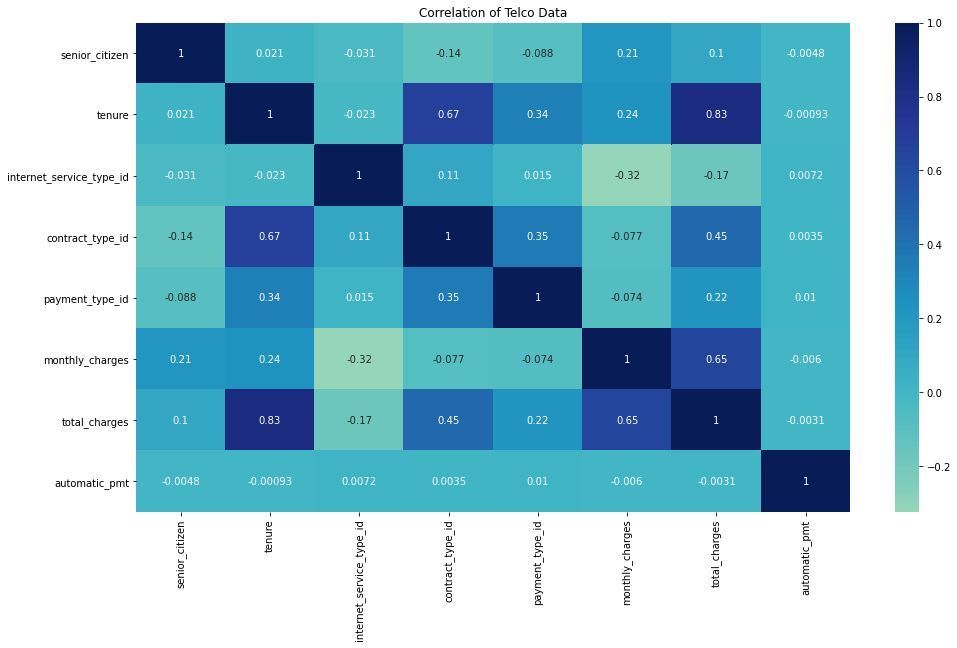

In [28]:
#heatmap to show correlation of all data
plt.figure(figsize=(16,9))

sns.heatmap(train_raw.corr(), cmap='YlGnBu', center=0, annot=True)

plt.title('Correlation of Telco Data')

plt.show()

# Find the appropriate statistical test to use

In [29]:
#Set our alpha
alpha = 0.05

### Check for independence amongst churn and automatic payment plan customers

#### Looking at the two following variables: churn (discrete/categorical) and automatic payment types (discrete/categorical)
- Since they are 2 discrete/categorical variables,  $\chi^2$ testing

In [30]:
null_hypothesis1 = "Customers who churn are independent of whether they are on automatic payments"


In [31]:
observed = pd.crosstab(train_raw.churn, train_raw.automatic_pmt)
observed

automatic_pmt,0,1
churn,,
No,5718,5849
Yes,2052,2107


In [32]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [33]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[5718 5849]
 [2052 2107]]
---
Expected

[[5715 5851]
 [2054 2104]]
---

chi^2 = 0.0076
p     = 0.9307


In [34]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis1)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Check for independence amongst churn and payment type

#### Looking at the two following variables: churn (discrete/categorical) and payment type (discrete/categorical)
- Since they are 2 discrete/categorical variables,  $\chi^2$ testing

In [35]:
null_hypothesis2 = "Customers who churn are independent of which payment plan they use"

In [36]:
observed = pd.crosstab(train_raw.churn, train_raw.payment_type_id)
observed

payment_type_id,1,2,3,4
churn,,,,
No,2891,2899,2892,2885
Yes,2362,677,597,523


In [37]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [38]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2891 2899 2892 2885]
 [2362  677  597  523]]
---
Expected

[[3863 2630 2566 2506]
 [1389  945  922  901]]
---

chi^2 = 1402.0542
p     = 0.0000


In [39]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis2)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that Customers who churn are independent of which payment plan they use


### Check for independence amongst churn and e-check customers

#### Looking at the two following variables: churn (discrete/categorical) and payment type (discrete/categorical)
- Since they are 2 discrete/categorical variables,  $\chi^2$ testing

In [40]:
null_hypothesis3 = "Customers who churn are independent of whether they use e-checks"

In [41]:
observed1 = pd.crosstab(train_raw.churn, train_raw.payment_type == 'Electronic check')
observed1

payment_type,False,True
churn,,
No,8696,2871
Yes,3100,1059


In [42]:
print('Observed1 - E-Check\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed1 - E-Check

[[2891 2899 2892 2885]
 [2362  677  597  523]]
---
Expected

[[3863 2630 2566 2506]
 [1389  945  922  901]]
---

chi^2 = 1402.0542
p     = 0.0000


In [43]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis3)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that Customers who churn are independent of whether they use e-checks


### Check for independence amongst churn and mailed check customers

In [44]:
null_hypothesis4 = "Customers who churn are independent of whether they use mailed checks"

In [45]:
observed2 = pd.crosstab(train_raw.churn, train_raw.payment_type == 'Mailed check')
observed2

payment_type,False,True
churn,,
No,8720,2847
Yes,3166,993


In [46]:
# use stats.chi2_contingency test for e-check customers
chi2, p, degf, expected = stats.chi2_contingency(observed2)

In [47]:
print('Observed1 - Mailed Check\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed1 - Mailed Check

[[2891 2899 2892 2885]
 [2362  677  597  523]]
---
Expected

[[8742 2824]
 [3143 1015]]
---

chi^2 = 0.8613
p     = 0.3534


In [48]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis4)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Check for independence amongst churn and automatic credit card customers

In [49]:
null_hypothesis5 = "Customers who churn are independent of whether they use automatic credit card"

In [50]:
observed3 = pd.crosstab(train_raw.churn, train_raw.payment_type == 'Credit card (automatic)')
observed3

payment_type,False,True
churn,,
No,8666,2901
Yes,3101,1058


In [51]:
# use stats.chi2_contingency test for e-check customers
chi2, p, degf, expected = stats.chi2_contingency(observed3)

In [52]:
print('Observed1 - Credit Card\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed1 - Credit Card

[[2891 2899 2892 2885]
 [2362  677  597  523]]
---
Expected

[[8655 2911]
 [3111 1047]]
---

chi^2 = 0.1905
p     = 0.6625


In [53]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis5)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Check for independence amongst churn and automatic bank transfer customers

In [54]:
null_hypothesis6 = "Customers who churn are independent of whether they use automatic bank transfer"

In [55]:
observed4 = pd.crosstab(train_raw.churn, train_raw.payment_type == 'Bank transfer (automatic)')
observed4

payment_type,False,True
churn,,
No,8619,2948
Yes,3110,1049


In [56]:
# use stats.chi2_contingency test for e-check customers
chi2, p, degf, expected = stats.chi2_contingency(observed4)

In [57]:
print('Observed1 - Bank Transfer\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed1 - Bank Transfer

[[2891 2899 2892 2885]
 [2362  677  597  523]]
---
Expected

[[8627 2939]
 [3101 1057]]
---

chi^2 = 0.0989
p     = 0.7532


In [58]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis6)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Check for independence amongst churn and month-to-month customers

#### Looking at the two following variables: churn (discrete/categorical) and contract  type (discrete/categorical)
- Since they are 2 discrete/categorical variables,  $\chi^2$ testing

In [59]:
null_hypothesis4 = "Customers who churn are independent of whether they are month-to-month contract customers"


In [60]:
observed = pd.crosstab(train_raw.churn, train_raw.contract_type)
observed

contract_type,Month-to-month,One year,Two year
churn,,,
No,4974,2922,3671
Yes,3704,352,103


In [61]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [62]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[4974 2922 3671]
 [3704  352  103]]
---
Expected

[[6382 2408 2775]
 [2295  865  998]]
---

chi^2 = 2681.9574
p     = 0.0000


In [63]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis4)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that Customers who churn are independent of whether they are month-to-month contract customers


<AxesSubplot:xlabel='count', ylabel='payment_type'>

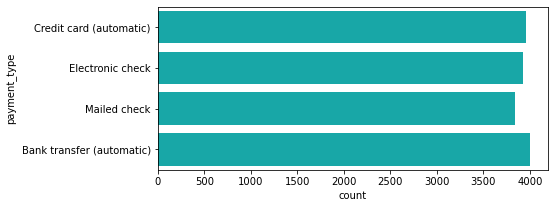

In [64]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="payment_type", data=train_raw, color="c")


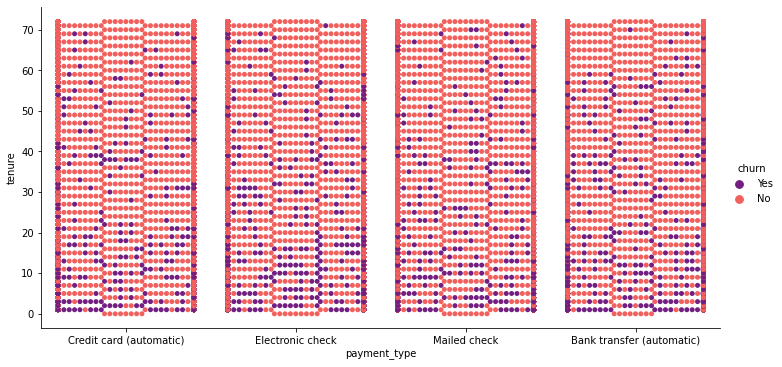

In [65]:
sns.catplot(x="payment_type", y="tenure", hue="churn", aspect=2,
            kind="swarm", data=train_raw, palette = 'magma')

In [66]:
train_raw.payment_type.value_counts()

Bank transfer (automatic)    3997
Credit card (automatic)      3959
Electronic check             3930
Mailed check                 3840
Name: payment_type, dtype: int64

In [67]:
train_raw[train_raw.churn == "No"].payment_type.value_counts()

Bank transfer (automatic)    2948
Credit card (automatic)      2901
Electronic check             2871
Mailed check                 2847
Name: payment_type, dtype: int64

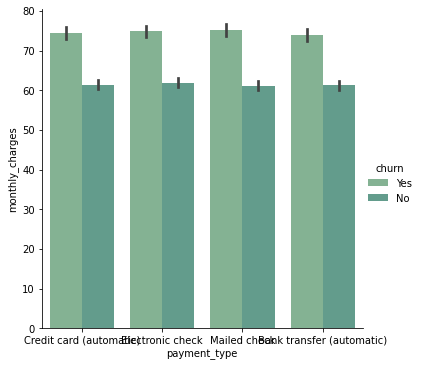

In [68]:
sns.catplot(x="payment_type", y="monthly_charges", hue="churn", kind="bar", data=train_raw)

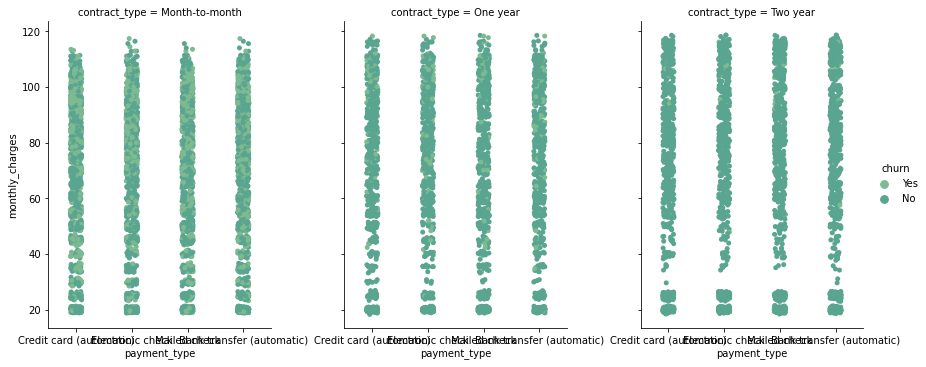

In [69]:
sns.catplot(x="payment_type", y="monthly_charges", hue="churn",
...                 col="contract_type", data=train_raw,
...                 height=5, aspect=.8)

#### Univariate Stats: 

##### Descriptive stats, frequencies, histograms. General familiar with data.

- Explore the target variable.

- Explore the categorical/qualitative variables.

- Explore the continuous/quantitative variables.

In [70]:
#First, we need list of categorical variables and one of quantitative variables.

cat_vars_raw_all = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'churn', 'contract_type',
        'internet_service_type','payment_type', 'automatic_pmt']

cat_vars_encoded_all = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn','multiple_lines_Yes',
            'online_security_Yes','online_backup_Yes', 'tech_support_Yes',
           'streaming_tv_Yes','streaming_movies_Yes',
           'contract_type_Month-to-month', 'contract_type_One year',
           'contract_type_Two year', 'internet_service_type_DSL',
           'internet_service_type_Fiber optic', 'internet_service_type_None',
           'payment_type_Bank transfer (automatic)',
           'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
           'payment_type_Mailed check', 'automatic_pmt']

In [71]:
cat_vars_raw_pmt = ['churn', 'contract_type','payment_type', 'automatic_pmt']

cat_vars_encoded_pmt = ['paperless_billing', 'churn',
           'payment_type_Bank transfer (automatic)',
           'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
           'payment_type_Mailed check', 'automatic_pmt']

quant_vars = ['tenure', 'monthly_charges','total_charges']

In [72]:
train_raw.payment_type.value_counts()

Bank transfer (automatic)    3997
Credit card (automatic)      3959
Electronic check             3930
Mailed check                 3840
Name: payment_type, dtype: int64

In [ ]:
train_raw.automatic_pmt.value_counts()

In [ ]:
train_raw.churn.value_counts()

In [ ]:
train_raw.isnull().sum()

In [ ]:
train_raw.phone_service.value_counts()

In [ ]:
train_raw.internet_service_type.value_counts()

In [ ]:
sns.histplot(train_raw.payment_type)
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_encoded.automatic_pmt.value_counts()

In [ ]:
#Use the explore_univariate function to look at the different features in the raw dataframe

explore.explore_univariate(train_raw, cat_vars_raw_pmt, quant_vars)

In [ ]:
#Use the explore_univariate function to look at the different features in the encoded dataframe

explore.explore_univariate(train_raw, cat_vars_raw_pmt, quant_vars)

In [ ]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [ ]:
  '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
descriptive_stats_raw = train_raw[quant_vars].describe()
descriptive_stats_raw

In [ ]:
descriptive_stats_encoded = train_encoded[quant_vars].describe()
descriptive_stats_encoded

In [ ]:
sns.histplot(train_raw.churn)
plt.show()

In [ ]:
sns.histplot(train_raw.automatic_pmt)
plt.show()

In [ ]:
#visualize churn data using a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='churn', data=train_raw)
plt.show()

In [ ]:
    p = plt.subplot(1, 2, 1)
    p = plt.hist(train_encoded[quant_vars])
    p = plt.title(quant_vars)

In [ ]:
    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train_encoded[quant_vars])
    p = plt.title(quant_vars)

### Bivariate Stats

We will use our explore_bivariate(train, target, cat_vars, quant_vars) function that takes in a dataframe, the name of the binary target variable, a list of the names of the categorical variables, a list of the names of the quantitative variables. Each feature is analyzed with respect to the binary target variable. 
For each categorical variable, a crosstab of frequencies is returned along with the results from a chi-square test that is run, and a barplot. For each quantitative variable, descriptive statistics are computed with respect to the target variable. Difference in means of the quant variable are tested between each class in the target using Mann-Whitney. Finally, a boxenplot and a swarmplot of the target with the quantitative variable are returned.

We will want to remove the target variable from that list, as the function takes that variable as a separate argument.

In [ ]:
cat_vars_w_o_target_encoded = ['payment_type_bank_transfer_auto',
       'payment_type_credit_card_auto', 'payment_type_e_check',
       'payment_type_mailed_check', 'automatic_pmt']

In [ ]:
cat_vars_w_o_target_raw = ['contract_type','payment_type', 'automatic_pmt']

In [ ]:
explore.explore_bivariate(train_encoded, 'churn', cat_vars_w_o_target_encoded, quant_vars)

In [ ]:
explore.explore_bivariate(train_encoded, 'churn', cat_vars_w_o_target_pmt, quant_vars)

In [ ]:
def category_percentages_by_another_category_col(df, category_a, category_b):
    """
    Produces a .catplot with a norma
    """
    (df.groupby(category_b)[category_a].value_counts(normalize=True)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot, 'data'), x=category_a, y='percent', col=category_b, kind='bar'))

In [ ]:
category_percentages_by_another_category_col(train_raw, "payment_type", "churn")

In [ ]:
pmt_type_pct= (df.groupby(['churn'])['payment_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('payment_type'))
p = sns.barplot(x="payment_type", y="percentage", hue="churn", data=pmt_type_pct)
_ = plt.setp(p.get_xticklabels(), rotation=45)  # Rotate labels

In [ ]:
sns.catplot(x="payment_type", y="tenure", hue="churn",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=train_raw, )

#### Takeaways

### Multivariate Stats & Analysis

Looking at a categorical target variable, color will represent the target, and then plot two features, x and y.

Use our function, explore_multivariate(train, target, cat_vars, quant_vars) to generate the following: 
- 2 grid plots (swarmplot and violinplot) of categorical variables x quantitative variables
- a Pairplot plotting each unique pair of quantitative variables
- a single swarmplot visualizing the values of each quantitative variable

For all of these, color represents the target variable.

In [ ]:
import seaborn as sns

sns.distplot(train_encoded.churn)

In [ ]:

sns.distplot(train_encoded.monthly_charges)

In [ ]:
target = 'churn'

explore.explore_multivariate(train_encoded, target, cat_vars_raw, quant_vars)

#### Takeaways

- Majority of customers are not senior citizens: About 84% are not senior citizens while 16% are senior citizens
- About equal amount of customers have a partner: 51% do not have a partner while 49% do have a partner
- Majority of customers do not have dependents: 70% do not have dependents while 30% do
- Majority of customers do subscribe to phone service: 90% do have phone service while 10% do not
- About equal amount of customer use paperless billing: 59% do not have paperless billing while 41% do
- Majority of customers are not churning: 74% did not churn while 26% did churn
- Majority of customers do not have multiple lines: 76% do not have multiple lines while 24% do
- Majority of customers do not have online security: 85% do not have online security while 15% do
- Majority of customers do not have streaming TV: 81% do not have streaming TV while 19% do
- Majority of customers do not have tech support: 85% do not while 15% do
- Majority of are not month-to-month customers: 72% are not while 28% are
- Average tenure is 32 months
- Average monthly charge is 65 with a min of 18 and a max of 119
- Average total charges are 2295 with a min of 0 and a max of 8684
- Majority of customers are on automatic payment plan: 75% are on automatic while 25% are not on automatic payment plan



# Modeling and Evaluation

Plan -> Acquire -> Prepare -> Explore -> <span style='background :skyblue' > MODEL & EVALUATE </span>-> Deliver



Establish a baseline accuracy to determine if having a model is better than no model and train and compare at least 3 different models. Document these steps well.

Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters you use.

Compare evaluation metrics across all the models you train and select the ones you want to evaluate using your validate dataframe.

Feature Selection (optional): Are there any variables that seem to provide limited to no additional information? If so, remove them.

Based on the evaluation of your models using the train and validate datasets, choose your best model that you will try with your test data, once.

Test the final model on your out-of-sample data (the testing dataset), summarize the performance, interpret and document your results.



### Setup the baseline

In [ ]:
#The most frequenly observed outcome will be our baseline
train_raw.churn.value_counts()

In [ ]:
train_encoded.churn.value_counts()

In [ ]:
#Create the  baseline
#Because the majority did not churn, we will use 0 as our baseline
train_raw['baseline_pred_raw'] = 0

In [ ]:
train_encoded['baseline_pred_encoded'] = 0

In [ ]:
#Establish baseline accuracy
baseline_accuracy_raw = (train_raw.churn == train_raw.baseline_pred_raw).mean()
print(f'The baseline accuracy is: {baseline_accuracy_raw:.2%}')

In [ ]:
baseline_accuracy_encoded = (train_encoded.churn == train_encoded.baseline_pred_encoded).mean()
print(f'The baseline accuracy is: {baseline_accuracy_encoded:.2%}')

### Split the data along the target variable to prepare for use in models

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn', 'baseline_pred_encoded']])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [ ]:
X_train = train_encoded.drop(columns=['churn','baseline_pred_encoded'])
y_train = train_encoded.churn

X_validate = validate_encoded.drop(columns=['churn'])
y_validate = validate_encoded.churn

X_test = test_encoded.drop(columns=['churn'])
y_test = test_encoded.churn

In [ ]:
X_train.columns

In [ ]:
X_validate.shape

In [ ]:
X_train.shape

In [ ]:
set(X_train.columns).difference(set(X_validate.columns))

### Decision Tree Model

In [ ]:
# Create the Decision Tree object with desired hyper-parameters.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
#Fit the random forest model to the training data.
clf = clf.fit(X_train, y_train)

In [ ]:
#Use the model to get accuracy on training dataset
print('Accuracy of Decision Tree model on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on validate dataset
print('Accuracy of Decision Tree model on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
print(f'training score: {clf.score(X_train, y_train):.2%}')
print(f'validate score: {clf.score(X_validate, y_validate):.2%}')

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
#Visualize the Decision Tree with the use of Graphviz

#By visualizing the tree, we can see the importance of features, as teh most important features will be the first splits.
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

### Decision Tree Model Takeaways:
- Decision Tree Model has an accuracy of % using the train set using max_depth=
- Decision Tree Model has an accuracy of % using the validate set using max_depth=
- Both are higher than the baseline accuracy of %

### Random Forest Model
   

In [ ]:
#Create the Random Forest object with desired hyper-parameters.
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
# Fit the random forest model to the training data.
rf.fit(X_train, y_train)

In [ ]:
#Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

In [ ]:
#Make Predictions
y_pred = rf.predict(X_train)

In [ ]:
#Use the model to get accuracy on training dataset
print('Accuracy of random forest model on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on the validate dataset.
print('Accuracy of random forest model on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

### Random Forest Model Takeaways:
- Random Forest Model has an accuracy of % using the train set
- Random Forest Model has an accuracy of % using the validate set
- Both are higher than the baseline accuracy of %

- Overfit?

### K - Nearest Neighbors Model

In [ ]:
#Create KNN Model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
#Fit the model to the training data.
knn.fit(X_train, y_train)

In [ ]:
#Use the model to get accuracy on training dataset
print('Accuracy of KNN model on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on validate dataset
print('Accuracy of KNN model on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

In [ ]:
#Make Predictions
y_pred = knn.predict(X_train)

### K-Nearest Neighbors Model Takeaways:
- K-Nearest Neighbors Model has an accuracy of % using the train set
- K-Nearest Neighbors Model has an accuracy of % using the validate set
- Both are higher than the baseline accuracy of %

- Overfit?

### Logistic Regression Model

In [ ]:
# Create the logistic regression model
logit = LogisticRegression(C=1, random_state=123)


In [ ]:
#Fit the logistic regression model to the training data.
logit.fit(X_train, y_train)

In [ ]:
#Use the model to get accuracy on training dataset
print(print('Accuracy of logistic regression model on training set: {:.2f}'
     .format(logit.score(X_train, y_train))))

In [ ]:
#Use the model to get accuracy on validate dataset
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

In [ ]:
#Evaluate importance, or weight, of each feature, using the coefficients.

#Evaluate the intercept of the model.

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
# Make Predictions
y_pred = logit.predict(X_train)

In [ ]:
#Classification report of model
print(classification_report(y_validate, y_pred1))

In [ ]:
# specify the features we're using
features1 = ["automatic_pmt"]

features2 = ["automatic_pmt", "total_charges"]

features3 = ["automatic_pmt", "total_charges", "contract_type_Month-to-month"]

features4 = ["automatic_pmt", "total_charges", "contract_type_Month-to-month", "internet_service_type_Fiber optic"]

In [ ]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=123)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit1.fit(X_train[features1], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred1 = logit1.predict(X_train[features1])

print("Baseline is", round(baseline_accuracy_encoded, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features1], y_train)))

In [ ]:
# Create the logistic regression
logit2 = LogisticRegression(random_state=123)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit2.fit(X_train[features2], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred2 = logit2.predict(X_train[features2])

print("Baseline is", round(baseline_accuracy_encoded, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train[features2], y_train)))

In [ ]:
# Create the logistic regression
logit3 = LogisticRegression(random_state=123)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit3.fit(X_train[features3], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred3 = logit3.predict(X_train[features3])

print("Baseline is", round(baseline_accuracy_encoded, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train[features3], y_train)))

In [ ]:
# Create the logistic regression
logit4 = LogisticRegression(random_state=123)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit4.fit(X_train[features4], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred4 = logit4.predict(X_train[features4])

print("Baseline is", round(baseline_accuracy_encoded, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit4.score(X_train[features4], y_train)))

### Logistic Regression Model Takeaways:
- Logistic Regression Model has an accuracy of % using the train set
- Logistic Regression Model has an accuracy of % using the validate set
- Both are higher than the baseline accuracy of %

- Overfit?

# Delivery

Plan -> Acquire -> Prepare -> Explore -> Model & Evaluate -> <span style='background :skyblue' > DELIVER </span>

Introduce yourself and your project goals at the very beginning of your notebook walkthrough.

Summarize your findings at the beginning like you would for an Executive Summary. Just because you don't have a slide deck for this presentation, doesn't mean you throw out everything you learned from Storytelling.

Walk us through the analysis you did to answer our questions and that lead to your findings. Relationships should be visualized and takeaways documented. Please clearly call out the questions and answers you are analyzing as well as offer insights and recommendations based on your findings.

For example: If you find that month-to-month customers churn more, we won't be surprised, but Telco is not getting rid of that plan. The fact that customers churn is not because they can; it's because they can and they are motivated to do so. We want your insights into why they are motivated to do so. We realize you will not be able to do a full causal experiment, but we would like to see some solid evidence of your conclusions.

Finish with key takeaways, recommendations, and next steps and be prepared to answer questions from the data science team about your project.

Remember you have a time limit of 5 minutes for your presentation. Make sure you practice your notebook walkthrough keeping this time limit in mind; it will go by very quickly.

### Key Takeaways
- ad
- bd

### Recommendations
- ad
- bd

### Next Steps
- ad
- bd